# Outlier Capping IQR
Treat outliers as missing data, and proceed with any missing data
imputation technique


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# boston house dataset for the demo
from sklearn.datasets import load_boston
from feature_engine.outliers import Winsorizer

In [52]:
! pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 8.8 MB/s 


In [ ]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]
boston['MEDV'] = boston_dataset.target
boston.head()

In [21]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [22]:
up_RM,lb_RM= find_skewed_boundaries(boston, 'RM', 1.5)
up_LSTAT,lb_LSTAT=find_skewed_boundaries(boston, 'LSTAT', 1.5)
up_CRIM,lb_CRIM=find_skewed_boundaries(boston, 'CRIM', 1.5)

In [23]:
lb_RM,up_RM

(4.778499999999999, 7.730500000000001)

#Replace the outliers by the maximum and minimum limit.

In [33]:
df_limit=boston.copy()

#Get outliers

In [8]:
RM_outlier_mask=outliers_mask_RM=(boston['RM']>up_RM ) | ( boston['RM']<lb_RM)

In [34]:
df_limit.loc[df_limit['RM']>up_RM , 'RM'] = up_RM
df_limit.loc[df_limit['RM']<lb_RM , 'RM'] = lb_RM

In [38]:
def cap_outlier(df,variable,upper_limit,lower_limit):
  df.loc[df_limit[variable]>upper_limit , variable] = upper_limit
  df.loc[df_limit[variable]<lower_limit , variable] = lower_limit
  return df

In [39]:
df_limit=cap_outlier(df_limit,'RM',up_RM,lb_RM)

In [41]:
df_limit=cap_outlier(df_limit,'LSTAT',up_LSTAT,lb_LSTAT)

In [42]:
df_limit=cap_outlier(df_limit,'CRIM',up_CRIM,lb_CRIM)

In [40]:
RM_outlier_mask=outliers_mask_RM=(df_limit['RM']>up_RM ) | ( df_limit['RM']<lb_RM)
RM_outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

In [43]:
def doagnostic_plot(df,feature_name):
   # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature_name], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[feature_name], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature_name])
    plt.title('Boxplot')

    plt.show()

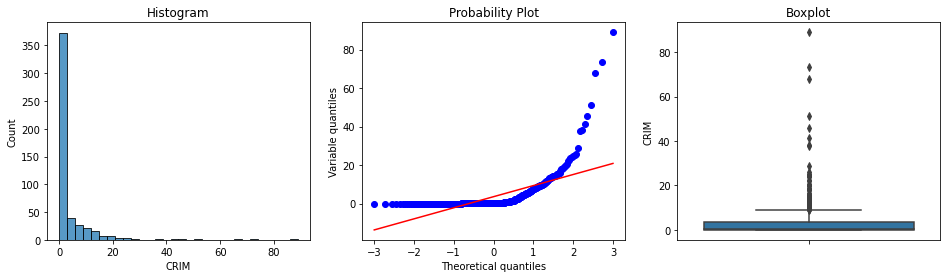

In [47]:
doagnostic_plot(boston, 'CRIM')

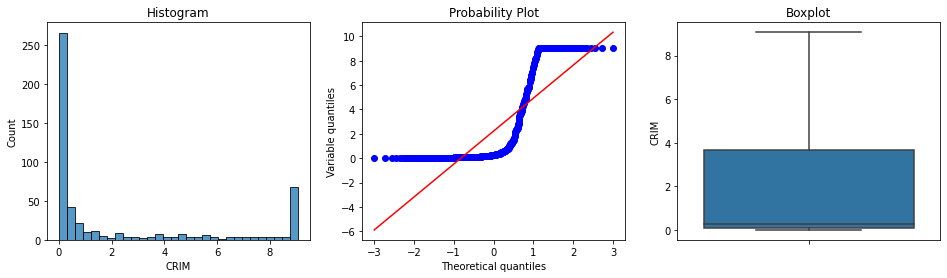

In [48]:
doagnostic_plot(df_limit, 'CRIM')

In [49]:
df_limit.skew()

RM       0.296640
LSTAT    0.808671
CRIM     1.282313
MEDV     1.108098
dtype: float64

In [50]:
boston.skew()

RM       0.403612
LSTAT    0.906460
CRIM     5.223149
MEDV     1.108098
dtype: float64

In [54]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [55]:
boston_t = windsoriser.transform(boston)
